# **Linear Regression approach utilizing the Backward Elimination method**

### Import Dependencies

In [20]:
# Import required libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from math import exp


### Load the Dataset Prepared through Feature Engineering (Includes Time Series Features)

In [19]:
import requests
from io import BytesIO

# Load the dataset from CSV files
Y_train = pd.read_csv("/content/Beijing_simple_model_ytrain.csv")
X_test = pd.read_csv("/content/Beijing_simple_model_xtest.csv")
Y_test = pd.read_csv("/content/Beijing_simple_model_ytest.csv")
X_train = pd.read_csv("/content/Beijing_simple_model_xtrain.csv")

# Display the dimensions of the dataframes
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)
print("Shape of X_train:", X_train.shape)


Shape of Y_train: (33480, 35)
Shape of X_test: (1392, 278)
Shape of Y_test: (1392, 35)
Shape of X_train: (33480, 278)


### Backward Elimination Function

In [21]:
!pip3 install statsmodels

# Backward Elimination: Features are evaluated based on their significance (p-value)
import statsmodels.api as sm

def backward_elimination(X_train, Y_train, X_test, Y_test, significance_level=0.05):
    """
    Perform backward elimination to select the most significant features.

    Parameters:
    X_train (pd.DataFrame): Training feature set.
    Y_train (pd.Series): Training target variable.
    X_test (pd.DataFrame): Testing feature set.
    Y_test (pd.Series): Testing target variable.
    significance_level (float): Threshold p-value for feature inclusion (default is 0.05).

    Returns:
    pd.DataFrame: Feature set after backward elimination.
    """

    # Columns representing boolean values
    boolean_columns = ['Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']

    # Convert boolean columns to integer type
    X_train[boolean_columns] = X_train[boolean_columns].astype(int)
    X_test[boolean_columns] = X_test[boolean_columns].astype(int)

    # Combine training and testing datasets
    X_combined_df = pd.concat([X_train, X_test], axis=0)
    Y_combined_df = pd.concat([Y_train, Y_test], axis=0)

    # Set combined data for backward elimination
    X = X_combined_df
    y = Y_combined_df['Target_AQHI_1h']

    # Track the number of features
    num_features = X.shape[1]

    # Iteratively remove features with the highest p-value above the significance level
    for i in range(num_features):
        # Fit an Ordinary Least Squares (OLS) regression model
        model = sm.OLS(y, X).fit()

        # Calculate p-values for features
        p_values = model.pvalues

        # Identify the feature with the maximum p-value
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            # Drop the feature with the highest p-value
            feature_to_remove = p_values.idxmax()
            X = X.drop(columns=[feature_to_remove])
            print(f"Dropping feature '{feature_to_remove}' with p-value: {max_p_value}")
        else:
            # Exit if all p-values are below the threshold
            break

    return X


### Compute Metrics

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to evaluate the performance of the model
def model_evaluation(y_test: np.ndarray, y_pred: np.ndarray):
    """
    Evaluate model performance by calculating MAE and MSE.

    :param np.ndarray y_test: Array of actual target values.
    :param np.ndarray y_pred: Array of predicted target values (aligned with y_test).
    :return: Tuple containing Mean Absolute Error (MAE) and Mean Squared Error (MSE).
    :rtype: tuple of floats
    """

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    return mae, mse


### Plotting the Response

In [23]:
def plot_response(y_pred, y_test):
    """
    Plot the true values (y_test) and predicted values (y_pred) for comparison.

    :param y_pred: Array or list of predicted values.
    :param y_test: Array or list of actual target values.
    """

    # Create x-values based on the length of the test data
    x_values = np.arange(len(y_test))

    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Plot actual values (y_test)
    plt.plot(x_values, y_test, label='Actual values (y_test)')

    # Plot predicted values (y_pred) with a dashed line
    plt.plot(x_values, y_pred, label='Predicted values (y_pred)', linestyle='--')

    # Add axis labels and a legend
    plt.xlabel('Index')
    plt.ylabel('Target Values')
    plt.legend()

    # Display the plot
    plt.show()


### Best Simple Model

Dropping feature 'O3_Lag_16' with p-value: 0.9897830787141864
Dropping feature 'O3_Lag_24' with p-value: 0.9864408087102495
Dropping feature 'O3_1day_ago' with p-value: 0.9864408057948058
Dropping feature 'PM2.5_Lag_20' with p-value: 0.9656732521944278
Dropping feature 'RAIN_Mean_24h' with p-value: 0.9516025140778475
Dropping feature 'NO2_Lag_5' with p-value: 0.9488442315346834
Dropping feature 'O3_Mean_24h' with p-value: 0.9331497252522626
Dropping feature 'CO_Std_24h' with p-value: 0.9206858195059122
Dropping feature 'PM2.5_Lag_19' with p-value: 0.917940385325827
Dropping feature 'PM2.5_Lag_18' with p-value: 0.9147406782559075
Dropping feature 'CO_Lag_18' with p-value: 0.9155943082499766
Dropping feature 'CO_Lag_17' with p-value: 0.9618473027718486
Dropping feature 'RAIN_Mean_12h' with p-value: 0.9019086888158109
Dropping feature 'AQHI_Lag_13' with p-value: 0.8896036285476216
Dropping feature 'SO2_Lag_8' with p-value: 0.8866610146325407
Dropping feature 'SO2_Mean_24h' with p-value: 0

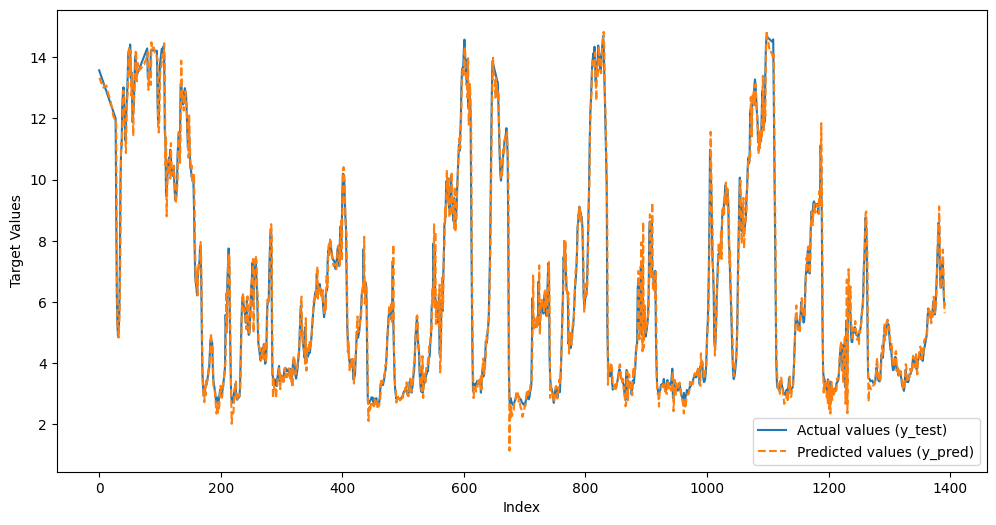

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to apply simple linear regression model
def linear_regression_model(X_train, Y_train, X_test, Y_test, target='Target_AQHI_1h'):
    """
    Train a linear regression model and evaluate performance using Backward Elimination.

    :param X_train: Training feature set.
    :param Y_train: Training target variable.
    :param X_test: Test feature set.
    :param Y_test: Test target variable.
    :param target: The target variable column name (default 'Target_AQHI_1h').
    :return: Fitted linear regression model, predicted values, MAE, and MSE.
    """

    # Perform backward elimination to select significant features
    X_selected = backward_elimination(X_train.copy(), Y_train.copy(), X_test.copy(), Y_test.copy())

    # List of selected feature columns
    X_selected_columns = list(X_selected.columns)

    # Update training and test data with selected features
    X_train = X_train.loc[:, X_selected_columns]
    y_train = Y_train[target]
    X_test = X_test.loc[:, X_selected_columns]
    y_test = Y_test[target]

    # Initialize the standard scaler
    scaler = StandardScaler()

    # Scale the training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the linear regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    predictions = model.predict(X_test_scaled)

    # Evaluate the model performance
    mae, mse = model_evaluation(y_test.values, predictions)

    return model, predictions, mae, mse

# Run the linear regression model
linear_model_reduced, linear_model_reduced_pred, linear_model_reduced_mae, linear_model_reduced_mse = linear_regression_model(
    X_train.copy(),
    Y_train.copy(),
    X_test.copy(),
    Y_test.copy()
)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", linear_model_reduced_mae)
print("Mean Squared Error (MSE):", linear_model_reduced_mse)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_reduced_mse))

# Plot the predicted vs actual values
plot_response(np.array(linear_model_reduced_pred), np.array(Y_test['Target_AQHI_1h']))

# It would take about 2 minutes to run because we are performing backward elimination with p-values.